In [1]:
from qiskit import *
%matplotlib inline
import numpy as np

In [2]:
#Let's take a set of N beamsplitters, each with a reflectivity of R = cos^2(pi/(2N))
#If we line them up, we'll get statistics that look quite a bit like an X gate with
#one pathway of light being the |0> state and the other being |1>. The |0> state just
#means that the photons went straight through the beamsplitters without veering off 
#onto the new path. The |1> state means the photon went off on the new path.
N = 10 #number of beamsplitters
theta = np.pi/N
nphotons = 10
backend = Aer.get_backend('qasm_simulator')

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
for i in range(N):
    circuit.rx(theta, q[0])
circuit.measure(q[0], c[0])
result = execute(circuit, backend=backend, shots = nphotons).result()
counts = result.get_counts()
# ntrans = counts.get(endstate)
print('Theoretical Prediction percent photons in |1>:', 1-(np.sin(theta/2)**2)**N)

Theoretical Prediction percent photons in |1>: 0.9999999999999999


In [15]:
counts

{'1': 10}

In [16]:
#Let's put an object in the way of the beamsplitters, such that if a photon does cross over,
#it is absorbed by the object:
N = 10 #number of beamsplitters
theta = np.pi/(N) # A measure of the reflectivity of the beamsplitter
nphotons = 10**6 #The number of photons we'll send through the system
endstate = '0'*N #Now if there is an object blocking the photon's upper path, we require that
                #ALL photons stay on the bottom path in order to be detected.
                #If our photon stays in the 0 state through all the beamsplitters, we can say that
                #it has been transmitted, and we'll see it on our detector as all |0> states.
                #Without the object blocking the way, we'll see all |1> states like we did above

q = QuantumRegister(1)
c = ClassicalRegister(N)
circuit = QuantumCircuit(q,c)
for i in range(N):
    circuit.rx(theta, q[0])
    circuit.measure(q[0], c[i])
result = execute(circuit, backend=backend, shots = nphotons).result()
counts = result.get_counts()
ntrans = counts.get(endstate)



print('Number photons transmitted:', ntrans)
print('Percent photons transmitted:', ntrans/nphotons)
print('Theoretical Prediction percent photons transmitted:', (np.cos(theta/2)**2)**N)

Number photons transmitted: 780556
Percent photons transmitted: 0.780556
Theoretical Prediction percent photons transmitted: 0.7805460697811405


KeyError: 0

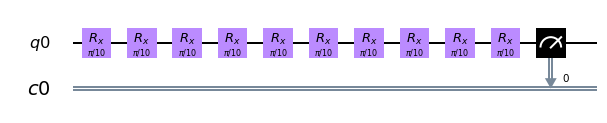

In [4]:
circuit.draw(output='mpl',filename='circuit.png')